In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd
import glob


In [3]:
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
from matplotlib import style
style.use('ggplot')

In [4]:
%matplotlib ipympl

In [5]:

experimentIds = [2605]
rerun = "sm1-focus-sep2020" #"sm1-march2020"
cam = "r1"

roi_size = 24
doBck = True

In [6]:

experimentIds = [2595]
rerun = "sm1-focus-sep2020" #"sm1-march2020"
cam = "m1"

roi_size = 24
doBck = True

In [7]:

experimentIds = [3139, 3141]
rerun = "sm1-focus-sep2020" #"sm1-march2020"
cam = "b1"

roi_size = 24
doBck = True

In [8]:
experimentIds = [1760] #[1760, 1762]
rerun = "ginga/detrend"
cam = "r3"
extra = ''
basePath = '/drp/analysis/sm3/'
roi_size = 24
doBck = True
threshold = 0.
Sources = ["neon"] #["neon","argon"] 

#visit = 35343
drpPath = "/data/drp"
repo = "sps"

In [9]:
arm = cam[0]
sm = int(cam[1])
print(arm, sm)

r 3


In [10]:
doSave = False

In [11]:
cluster = False

In [12]:
extra = ''
verbose = True

In [13]:
imgPath = basePath

In [14]:
for experimentId in experimentIds:

    csvPath = imgPath+"Exp"+str(experimentId)+"/"+rerun+"/roi"+str(roi_size)+"/doBck"+str(doBck)+"/"+extra
    dataPath = csvPath
    print(dataPath)

    searchFile = f"{csvPath}Imquality_{cam}_Exp{experimentId}*"
    print(searchFile)
    files = glob.glob(searchFile)

    if verbose:
        print(*files, sep="\n")

/drp/analysis/sm3/Exp1760/ginga/detrend/roi24/doBckTrue/
/drp/analysis/sm3/Exp1760/ginga/detrend/roi24/doBckTrue/Imquality_r3_Exp1760*
/drp/analysis/sm3/Exp1760/ginga/detrend/roi24/doBckTrue/Imquality_r3_Exp1760_41500_20220725T15h57.csv


In [15]:
ind = 0
file  = files[ind]

In [16]:
visit = int(file.split('/')[-1].split("_")[3])
print(visit)

41500


In [17]:
ob = pd.concat([pd.read_csv(filen) for filen in files ], ignore_index=True)

In [18]:
ob = pd.read_csv(file)

In [19]:
ob.columns

Index(['Unnamed: 0', 'objx', 'objy', 'pos', 'oid_x', 'oid_y', 'fwhm_x',
       'fwhm_y', 'fwhm', 'fwhm_radius', 'brightness', 'elipse', 'x', 'y',
       'skylevel', 'background', 'px', 'py', 'EE3', 'TotEE3', 'EL3', 'EE5',
       'TotEE5', 'EL5', 'fwhm_lsf', 'peak', 'fiber', 'wavelength',
       'peak_element', 'peak_exptime', 'peak_lamp', 'peak_dcb_wheel',
       'sep_thresh', 'sep_npix', 'sep_tnpix', 'sep_xmin', 'sep_xmax',
       'sep_ymin', 'sep_ymax', 'sep_px', 'sep_py', 'sep_x2', 'sep_y2',
       'sep_xy', 'sep_errx2', 'sep_erry2', 'sep_errxy', 'sep_a', 'sep_b',
       'sep_theta', 'sep_cxx', 'sep_cyy', 'sep_cxy', 'sep_cflux', 'sep_flux',
       'sep_cpeak', 'sep_brightness', 'sep_xcpeak', 'sep_ycpeak', 'sep_xpeak',
       'sep_ypeak', 'sep_flag', 'sep_cx', 'sep_cy', 'filename', 'visit',
       'xm1pos', 'xm2pos', 'xm3pos', 'motor1', 'motor2', 'motor3', 'fcaFocus',
       'fcaX', 'fcaY', 'fcaZ', 'ccdTemp', 'detBoxTemp', 'cam', 'obsdate',
       'experimentId', 'exptime', 'lamp', '

In [20]:
df = ob.groupby(["fiber"])[["wavelength", "py"]].diff()
df["res"] = df.wavelength / df.py
#.apply(lambda x: get_res(x["wavelength"], x["py"]))

In [21]:
print(df.res.describe())
pixRes = df.res.mean()
print(f"Resolution in nm/px {df.res.mean():3.3}")

count    80.000000
mean      0.086342
std       0.001226
min       0.082127
25%       0.085479
50%       0.086438
75%       0.087351
max       0.087977
Name: res, dtype: float64
Resolution in nm/px 0.0863


# Zemax model values

Red Low = 0.0847

Red Med = 0.0477 #nm/px

Blue = 0.0671

NIR 

In [22]:
# Requirements definition
if arm == "m":
    req_center_wave = 810
    req_res_value = 5000
elif arm == "r":
    req_center_wave = 810
    req_res_value = 2800
elif arm == "b":
    req_center_wave = 520
    req_res_value = 2300
elif arm == "n":
    req_center_wave = 1110
    req_res_value = 4100
else:
    raise ValueError(f'spectrograph arm {arm} is not correct.')

In [23]:
ob["power"] = ob.wavelength / (ob.fwhm_lsf * pixRes)

<AxesSubplot:>

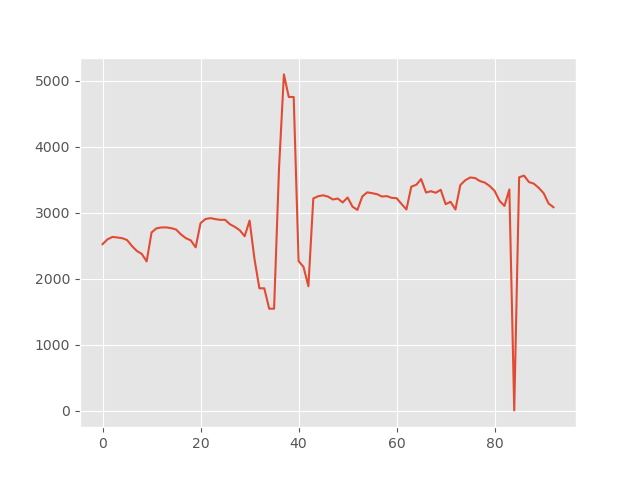

In [24]:
ob.power.plot()

<AxesSubplot:xlabel='wavelength', ylabel='fwhm_lsf'>

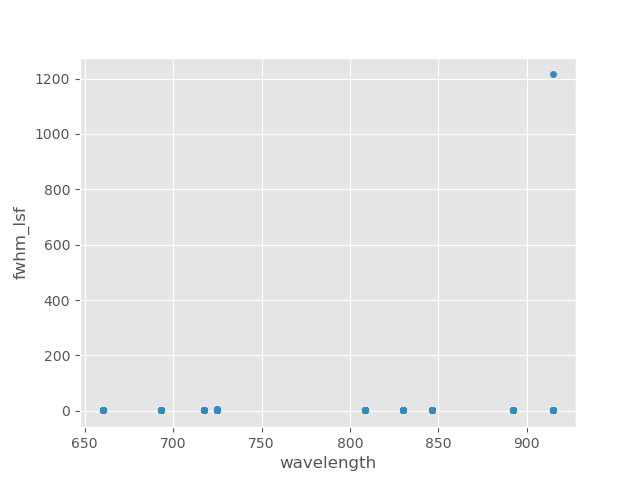

In [25]:
ob.plot.scatter(x="wavelength", y="fwhm_lsf")

<AxesSubplot:xlabel='wavelength', ylabel='fwhm_lsf'>

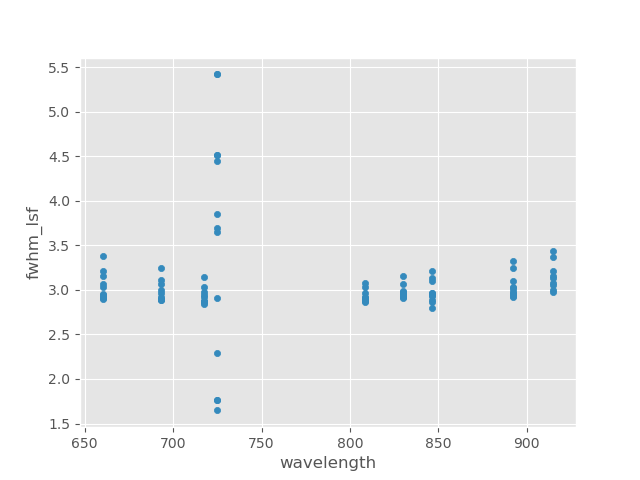

In [26]:
ob[ob.fwhm_lsf<10].plot.scatter(x="wavelength", y="fwhm_lsf")

In [27]:
imfile = f"SM{sm}_{cam.upper()}_resPower_{visit}"
print(imfile)

SM3_R3_resPower_41500


/tmp/ipykernel_4869/2569656331.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(req_center_wave,req_res_value, "ro", label="requirement", color="darkred" )


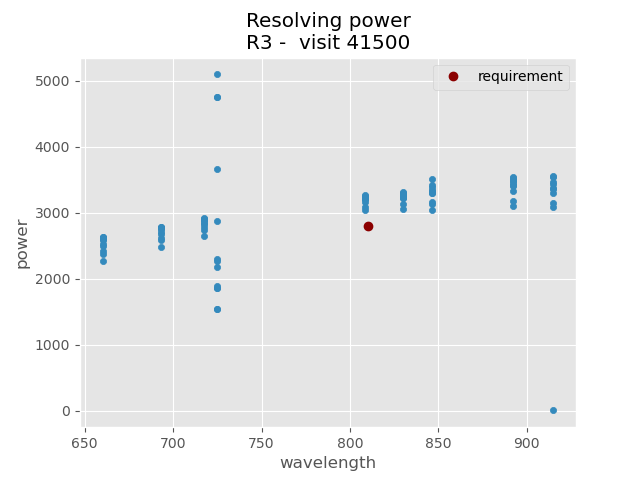

In [28]:
#fig = plt.figure(figsize=(10, 8))

ax = ob.plot.scatter(x="wavelength", y="power", style='-*' )
#ax.axhline(req_res_value, color="darkred", linestyle="--", label="requirement")
#ax.axvline(req_center_wave, color="darkred", linestyle="-", label="center wave")
ax.plot(req_center_wave,req_res_value, "ro", label="requirement", color="darkred" )
ax.set_title("Resolving power\n"+f"{cam.upper()} -  visit {visit}")
plt.legend()
if doSave:
    plt.savefig(imgPath+imfile+'.png', bbox_inches='tight')

In [29]:
imfile = f"SM{sm}_{cam.upper()}_LsfFWHM_{visit}"
print(imfile)

SM3_R3_LsfFWHM_41500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


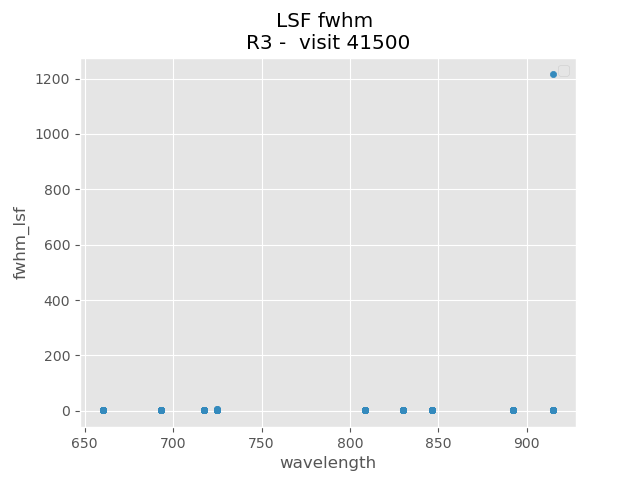

In [30]:
#fig = plt.figure(figsize=(10, 8))

ax = ob.plot.scatter(x="wavelength", y="fwhm_lsf", style='-*' )
ax.set_title("LSF fwhm \n"+f"{cam.upper()} -  visit {visit}")
plt.legend()
if doSave:
    plt.savefig(imgPath+imfile+'.png', bbox_inches='tight')